<h1>ASI Assignment</h1>
<br>
<span>Silvana BARBOZA</span>

<h2>Santander Customer Transaction Prediction</h2>

The objective of this competition is to identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted.
The dataset contains numeric feature variables, the binary target column, and a string ID_codecolumn.
The task is to predict the value of target column in the test set.

In [1]:
#Imports
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (7, 5)
pd.set_option('display.max_columns', 500)

from scipy import stats
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, f1_score
from sklearn.model_selection import train_test_split

### Exercise 1 
***
<span style="font-weight:500">
Download and import the Santander dataset. The labels of the test data are not publicly available, so create your own test set by randomly choosing half of the instances in the original training set. 
    

- Loading the dataset

In [2]:
santanderDF = pd.read_csv('data/train.csv',error_bad_lines=False)
santanderDF.shape

(200000, 202)

In [3]:
santanderDF.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

- Creating the testing

In [4]:
trainingDF, testingDF = train_test_split(santanderDF, test_size=0.5)

In [5]:
X_train = trainingDF.drop(['target', 'ID_code'], axis=1)
y_train = trainingDF['target'].values

X_test = testingDF.drop(['target', 'ID_code'], axis=1)
y_test = testingDF['target'].values

### Exercise 2
***
<span style="font-weight:500">
Comment on the distribution of class labels and the dimensionality of the input and how these may
affect the analysis
</span>

Percentage of the labels:
0    0.89951
1    0.10049
Name: target, dtype: float64


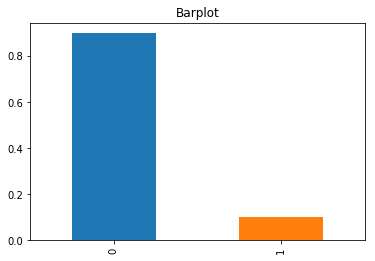

In [6]:
count = santanderDF['target'].value_counts(normalize=True)

count.plot(kind='bar', title="Barplot")

print("Percentage of the labels:")
print(count)
del count

We can see that the labels are not well distributed, they are very imbalanced. Almost 90% of the data is labeled as 0, while only 10% is 1. Having unbalanced training data may lead to misclassify labels when we have a few training samples. In addition, we have to be very careful computing accuracy (0/1 loss), because as we have imbalanced classes, a good accuracy in this case can represent a poor prediction in a class with low number of objects. For example, we can have a good accuracy, but the algorithm did not predict any 1 value.


To overcome this problem, I will also compute the F1-score, which is the weighted average of the precision (measures the rate of fase positives) and recall (mesures the rate of false negatives).

In [7]:
del santanderDF
del testingDF
del trainingDF

### Exercise 3 - Bayesian Linear Regression
***

In [8]:
#calculate the inverse of a matrix
def inv(x):
    return np.linalg.inv(x)

#calculate the multiplication a matrix
def mul(x,y):
    return np.dot(x,y)

In [9]:
#get the N-th order polynomial transformation of the input data 
def get_X(x, order):
    res = x.pow(0).values[:,0].reshape(-1,1)
    for i in range(1, order+1):
        p = x.pow(i).values

        res = np.concatenate((res, p), axis=1)

    return res

In [10]:
def get_w_hat(X, y):
    t = np.matrix(y).T
    return mul(mul(inv(mul(X.T,X)),X.T),t)

def get_sigma2_hat(X, t, k):
    w_hat = get_w_hat(X, t)
    t_ = np.matrix(t).T
    tXw = t_ - mul(X,w_hat)
    return np.float(mul((tXw.T),tXw)/len(t))

<span style="font-weight:500">
a) Implement Bayesian linear regression
    </span>

In [11]:
def bayesian_linear_reg(x, t, x_new, sigma_2 = None, order=1):
    X = get_X(x, order)
    
    #if sigma_2 is not pass on parameter, get sigma_2 hat
    if(sigma_2 is None):
        sigma_2 = get_sigma2_hat(X,t,order)
    
    S_size = X.shape[1]
    S = np.diag(np.random.uniform(0, 1, S_size))

    #posterior variance of the weights
    Sigma = inv((mul(X.T,X)/sigma_2) + inv(S))

    mu = mul(mul(Sigma, X.T), t) / sigma_2

    X_new = get_X(x_new, order)

    pred_mean = mul(X_new,mu)

    pred_variance = mul(mul(X_new, Sigma),X_new.T) + sigma_2
    
    return pred_mean, pred_variance

<span style="font-weight:500">
b) Discuss how can you select the (hyper-)parameters for the Gaussian prior
    </span>

The hyper-parameters of the Gaussian prior are the sigma square (sigma_2 in the code above) and the prior covariance S. The sigma square can be select randomly or calculate the optimum sigma square (sigma_2_hat) of the likelihood optimization. The prior covariance can be a diagnonal matrix, with random values.


<span style="font-weight:500">
c) Write code that calculates the N-th order polynomial transformation of the input data. For simplicity, do not consider polynomials of more than one variable (such as x2y), but raise each input variable to the power of N individually. Consider N=1, 2, 3, and 6. 
    </span>

In [12]:
#The method get_X return the N-th order polynomial transformation
for i in range(6):
    print("Order", i+1)
    print(get_X(X_train, i+1))
    print()

Order 1
[[ 1.     10.5225 -2.3186 ...  7.3404 13.1334 -2.2628]
 [ 1.     10.5218 -1.9103 ...  7.7161 15.9994 -0.9642]
 [ 1.     11.0336 -4.7759 ...  9.7014  8.6306  0.6821]
 ...
 [ 1.     14.2283 -8.0712 ... 10.2246  9.2457 14.558 ]
 [ 1.      8.4978 -7.3242 ...  8.2957 17.4841 11.2351]
 [ 1.     12.5648 -5.6464 ... 10.0039 11.6444  6.173 ]]

Order 2
[[  1.          10.5225      -2.3186     ...  53.88147216 172.48619556
    5.12026384]
 [  1.          10.5218      -1.9103     ...  59.53819921 255.98080036
    0.92968164]
 [  1.          11.0336      -4.7759     ...  94.11716196  74.48725636
    0.46526041]
 ...
 [  1.          14.2283      -8.0712     ... 104.54244516  85.48296849
  211.935364  ]
 [  1.           8.4978      -7.3242     ...  68.81863849 305.69375281
  126.22747201]
 [  1.          12.5648      -5.6464     ... 100.07801521 135.59205136
   38.105929  ]]

Order 3
[[ 1.00000000e+00  1.05225000e+01 -2.31860000e+00 ...  3.95511558e+02
   2.26533020e+03 -1.15861330e+01]
 [ 1.

<span style="font-weight:500">
d) Describe any additional pre-processing that you suggest for this data
    </span>

In [13]:
X_train.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000

For pre-processing the data we could standarlize the data and mapping it to a Gaussian Distribution (normalize) in order to to stabilize variance and minimize skewness.

<span style="font-weight:500">
e) Treat class labels as continuous and apply regression to the training data.
Also, calculate the posterior variance of the weights 
    </span>

In [14]:
#Creating a batch to apply regression on traning data 
def bayesian_linear_reg_batch(X_train, y_train, X_test, order, batch=20):
    batch_size = int(y_train.size / batch)

    mean = np.array([])
    variance = np.array([])

    for i in range(batch):
        test = X_test[batch_size*i:batch_size*(i+1)]
        m, v = bayesian_linear_reg(X_train, y_train, test, order=order)

        mean = np.append(mean, m)

    return mean

In [15]:
#Appling a regression on training data
mean = bayesian_linear_reg_batch(X_train, y_train, X_test, order=1, batch=10)

<span style="font-weight:500">
f) Suggest a way to discretize predictions and display the confusion matrix on the test data and report accuracy
    </span>

For discretize, I used 0.3 as threshold. So, for each value in array, if it is greater or equal 0.3, it will be 1, otherwise it will be 0.
I tested the threshold with several values and the 0.3 was the value that gave the best value for accuracy and f1-score.

In [16]:
#discretize prediction
def discretize(p):
    pred_discr = []
    for i in p:
        if(i>=0.3):
            pred_discr.append(1)
        else:
            pred_discr.append(0)
    return pred_discr


In [17]:
#Computing accuracy using the confusion matrix
def accuracy(cm):
    total=sum(sum(cm))
    
    tn = cm[0,0] #true negative
    tp = cm[1,1] #true positive
    
    return (tn+tp)/total

#Computing f1-score using the confusion matrix
def f1score(cm):
    tn = cm[0,0] #true negative
    tp = cm[1,1] #true positive
    fn = cm[1,0] #false negative
    fp = cm[0,1] #false positive
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    return 2 * (precision * recall) / (precision + recall)

In [20]:
disc = discretize(mean)
cm = confusion_matrix(y_test,disc)
accuracy(cm), f1score(cm)
print("Accuracy: {:.2f}".format(accuracy(cm)))
print("F1-score: {:.2f}".format(f1score(cm)))

Accuracy: 0.91
F1-score: 0.54


In [21]:
array = []
for i in range(1, 7):
    print("========= Order", i,"=========")
    mean = bayesian_linear_reg_batch(X_train, y_train, X_test, order=i, batch=10)
    disc = discretize(mean)
    cm = confusion_matrix(y_test,disc)
    print("Accuracy: {:.2f}".format(accuracy(cm)))
    print("F1-score: {:.2f}".format(f1score(cm)))
    array.append(accuracy(confusion_matrix(y_test,disc)))

print("\nMean accuracy {:.2f}".format(np.mean(array)))

========= Order 1 =========
Accuracy: 0.91
F1-score: 0.45
========= Order 2 =========
Accuracy: 0.91
F1-score: 0.54
========= Order 3 =========
Accuracy: 0.91
F1-score: 0.56
========= Order 4 =========
Accuracy: 0.91
F1-score: 0.56
========= Order 5 =========
Accuracy: 0.91
F1-score: 0.56
========= Order 6 =========
Accuracy: 0.91
F1-score: 0.56

Mean accuracy 0.91


I printed the accuracy for the first 6 orders. I rounded the results and in general, all of them had the same accuracy. However, the orders 3, 4, 5 and 6 had a better f1-score. So, I will proceed with the order 3 which is the lowest order with the best accuracy and score.

In [22]:
mean = bayesian_linear_reg_batch(X_train, y_train, X_test, order=3, batch=10)

In [23]:
def plot_confusion_matrix(cm,title=None,cmap=plt.cm.Blues):
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),           
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [24]:
pred_discr = discretize(mean)
cm = confusion_matrix(y_test,pred_discr)
cm = confusion_matrix(y_test,disc)
print("Accuracy: {:.2f}".format(accuracy(cm)))
print("F1-score: {:.2f}".format(f1score(cm)))

Accuracy: 0.91
F1-score: 0.56


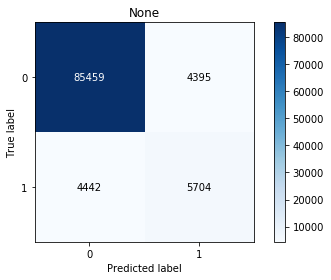

In [25]:
plot_confusion_matrix(cm)

<span style="font-weight:500">
    g) Discuss the performance, compare it against a classifier that outputs random class labels
<span>

In [29]:
acc = []
score = []
for i in range(1000):
    pred_random = np.random.randint(0,2,size=y_test.shape[0])
    cm = confusion_matrix(y_test,pred_random)
    acc.append(accuracy(cm))
    score.append(f1score(cm))

print("Mean accuracy: {:.2f}".format(np.mean(acc)))
print("Max accuracy: {:.2f}".format(np.max(acc)))
print("Min accuracy: {:.2f}".format(np.min(acc)))

print("======")
print("Mean F1-score: {:.2f}".format(np.mean(score)))
print("Max F1-score: {:.2f}".format(np.max(score)))
print("Min F1-score: {:.2f}".format(np.min(score)))

Mean accuracy: 0.50
Max accuracy: 0.50
Min accuracy: 0.49
Mean F1-score: 0.17
Max F1-score: 0.17
Min F1-score: 0.16


As you can see in the code above, I generated 10000 random samples and calculated their accuracy and f1-score. At the end, the mean, the maximum and the minimum of these values are shown.


While in the linear regression we obtained 0.9 of precision and 0.46 of f1-score, we can see a big difference in relation to the random prediction. The mean accuracy of the random classifier was considerably lower than 0.9 and even the maximum precision is not close to the precision of Bayesian linear regression.


In addition, the f1 score of the random prediction was around 0.17, significantly lower than the value we obtained in Bayesian linear regression (0.56)

### Exercise 4 -  Logistic Regression
***

<span style="font-weight:500">
a) The goal is to implement a logistic regression classifier that optimizes for the Maximum a Posteriori (MAP) estimate; assume a Gaussian prior on the parameters. As a first step, write a function that calculates the gradient of the joint likelihood
    </span>

In [30]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [31]:
def gradient_joint_likelihood(w, X, t, sigma = 1):
    _sum = 0
    for idx,xn in enumerate(X):
        Pn = sigmoid(np.dot(w.T,xn))
        tn = t[idx]
        _sum += xn * (tn - Pn)
        
    #computing the mean because the dataset is too big and the gradient doesn't convert with the sum
    _mean = _sum/X.shape[0] 
    
    return -(1/sigma)*w + _mean 

<span style="font-weight:500">
b) Write a simple gradient descend algorithm that uses the gradients calculated
by the function of previous question to converge to the MAP estimate
    </span>

In [65]:
def gradient_descend(X, y, w, learning_rate=0.05, max_iter=10000, precision=0.5):

    for i in range(max_iter):
        joint_grad = gradient_joint_likelihood(w, X, y, 10)        

        #stop condition
        if(np.mean(np.absolute(joint_grad)) < precision):
            break

        w += learning_rate * joint_grad
    
    return w, joint_grad

In [66]:
#Generating w ramdonly
w = np.random.rand(X_train.values.shape[1])

In [69]:
learning_rate = 0.001
max_iter = 100000
precision = 0.005
w, j_grad = gradient_descend(X_train.values, y_train,w, learning_rate, max_iter, precision)

In [79]:
np.mean(np.absolute(j_grad))

0.005532207402587765

<span style="font-weight:500">
c) Comment on the convexity of the problem; do you need multiple restarts in order
to obtain a solution sufficiently close to the global optimum?
    </span>

In fact, the gradient descend coded above converge to a optimum value for w. However the posterior might have several maxima and it is hard to know if the value of w that we found is th global optimum.


In this case, I ran the gradient descend with learning reate 0.001 and precision 0.005. I used the mean of the absolute values as a evaluation parameter. It took a long time to process it and I stopped it after 4 hours processing. The mean of the joint likelihood gradient is 0.05, not very good, but close to zero.


As the result is not a local minimum (but close to it), it will probably affect the evaluation.

<span style="font-weight:500">d) Report the confusion matrix and classification accuracy on the test data.
Discuss logistic regression performance with respect to the performance of
Bayesian linear regression</span>

In [71]:
#Checking the accuracy on training set
Pnew = sigmoid(mul(X_train.values,w))
pred = np.round(Pnew)
cm = confusion_matrix(y_train,pred)

print("Accuracy on training set: {:.2f}".format(accuracy(cm)))
print("F1-score on training set: {:.2f}".format(f1score(cm)))

Accuracy on training set: 0.91
F1-score on training set: 0.34


In [72]:
Pnew = sigmoid(mul(X_test.values,w))
pred = np.round(Pnew)
cm = confusion_matrix(y_test,pred)

print("Accuracy on testing set: {:.2f}".format(accuracy(cm)))
print("F1-score on testing set: {:.2f}".format(f1score(cm)))

Accuracy on testing set: 0.91
F1-score on testing set: 0.33


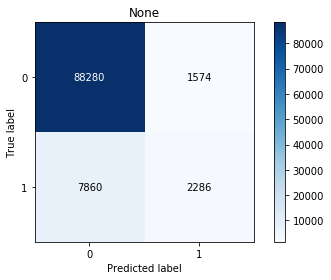

In [73]:
plot_confusion_matrix(cm)

The accuracy on the set was the same as the linear regression model (0.91). However, the F1-score was smaller (0.33 in Logistic and 0.56 in Linear). Probably this difference is because the gradient descend did not reach a local optimum in fact, but an approximation.

<span style="font-weight:500">
e) Laplace approximation is an efficient way to obtain an approximate
posterior for logistic regression. Describe the steps of this approach. What is the 
form of approximation obtained?</span> 

Given w_hat as the best w that we found in the previous steps (the MAP solution). Hence, w_hat are the values that maximizes the posterior.

The idea of Laplace approximation is to approximate the posterior with a Gaussian with mean w_hat and the variance the second gradient of the joint likelihood at w_hat.

Thus, to prediction, we draw N random samples from a Gaussian distribution with mu w_hat and the variance the second gradient of the joint likelihood at w_hat and then compute the sigmoid function, using the w sampled multiply by the Xnew. The prediction result would be the mean of all sample results.

It is important to say that the Laplace prediction will be as good as the approximations.

### Exercise 5 -  Bonus Question
***

<span style="font-weight:500">
    Implement the Laplace approximation and compare the predictive mean and
variances with the ones obtained by linear regression.
</span>

In [100]:
def second_derivative(w, X, t, sigma = 1):
    _sum = 0
    for idx,xn in enumerate(X):
        Pn = sigmoid(np.dot(w,xn))
        tn = t[idx]

        _sum += mul(xn,xn.T) * Pn * (1 - Pn)
    
    sigma_I = np.identity(w.size)/sigma
    return - sigma_I - _sum

In [101]:
def laplace_predict(mu, Sigma, X, Ns=100):
    _sum = 0 
    for i in range(Ns):
        ws = np.random.multivariate_normal(mu, Sigma)
        _sum += sigmoid(mul(X, ws))
    return np.round(_sum / Ns)

In [104]:
mu = w
Sigma = - second_derivative(w,X_train.values, y_train, 1).T

pred = laplace_predict(mu, Sigma, X_test.values, 100)
cm = confusion_matrix(y_test,pred)
print("Accuracy on testing set: {:.2f}".format(accuracy(cm)))
print("F1-score on testing set: {:.2f}".format(f1score(cm)))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Accuracy on testing set: 0.90
F1-score on testing set: nan


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in long_scalars


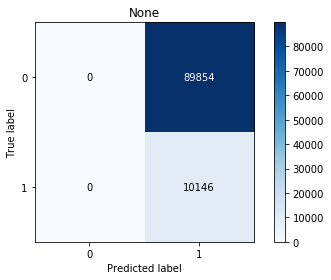

In [103]:
plot_confusion_matrix(cm)